# Previous

In [284]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt

def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    return B_true, W_est, W_est_1

def draw_results_3(n_nodes, er, seed, version_path):
    B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W21| null after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W22| after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][0], label='log|W12| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][1], label='log|W12| after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][2], label='log|W21| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][3], label='log|W21| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][3], label='log|W22| after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][0], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][2], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][3], label='log|W21| null after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed}")
    plt.tight_layout()
    # plt.legend()
    plt.show()

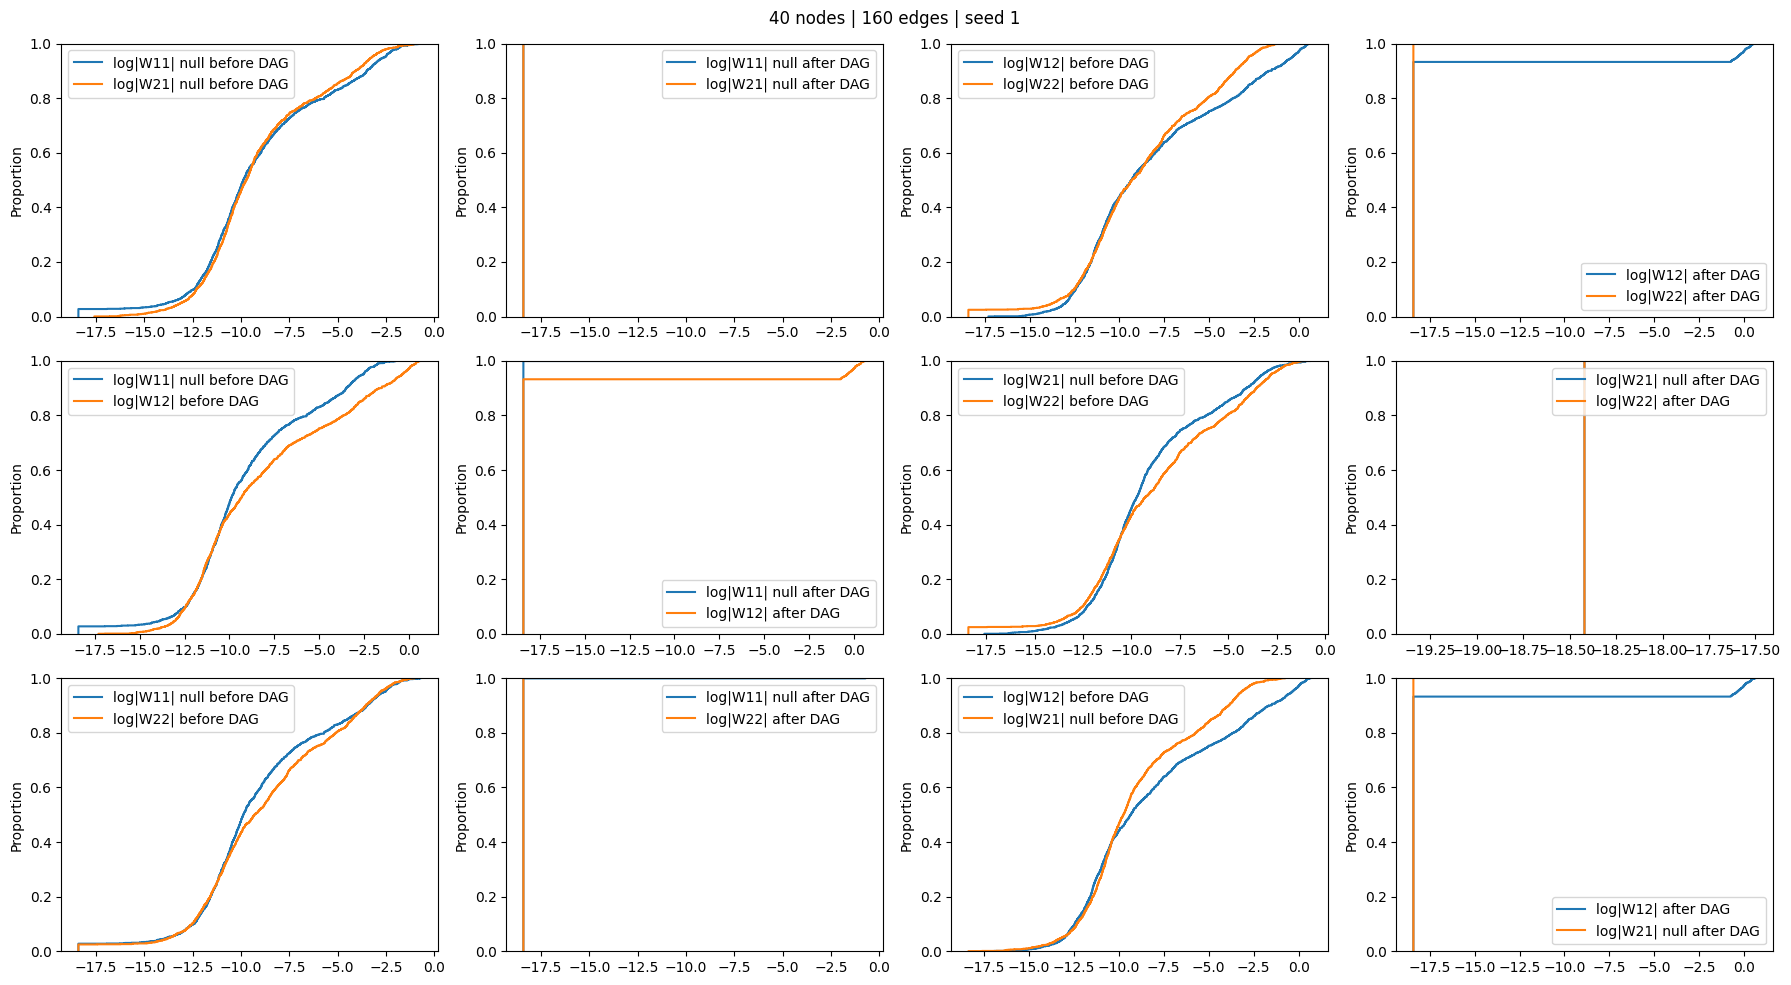

In [4]:
draw_results_3(40, 4, 1, "v34/v40")

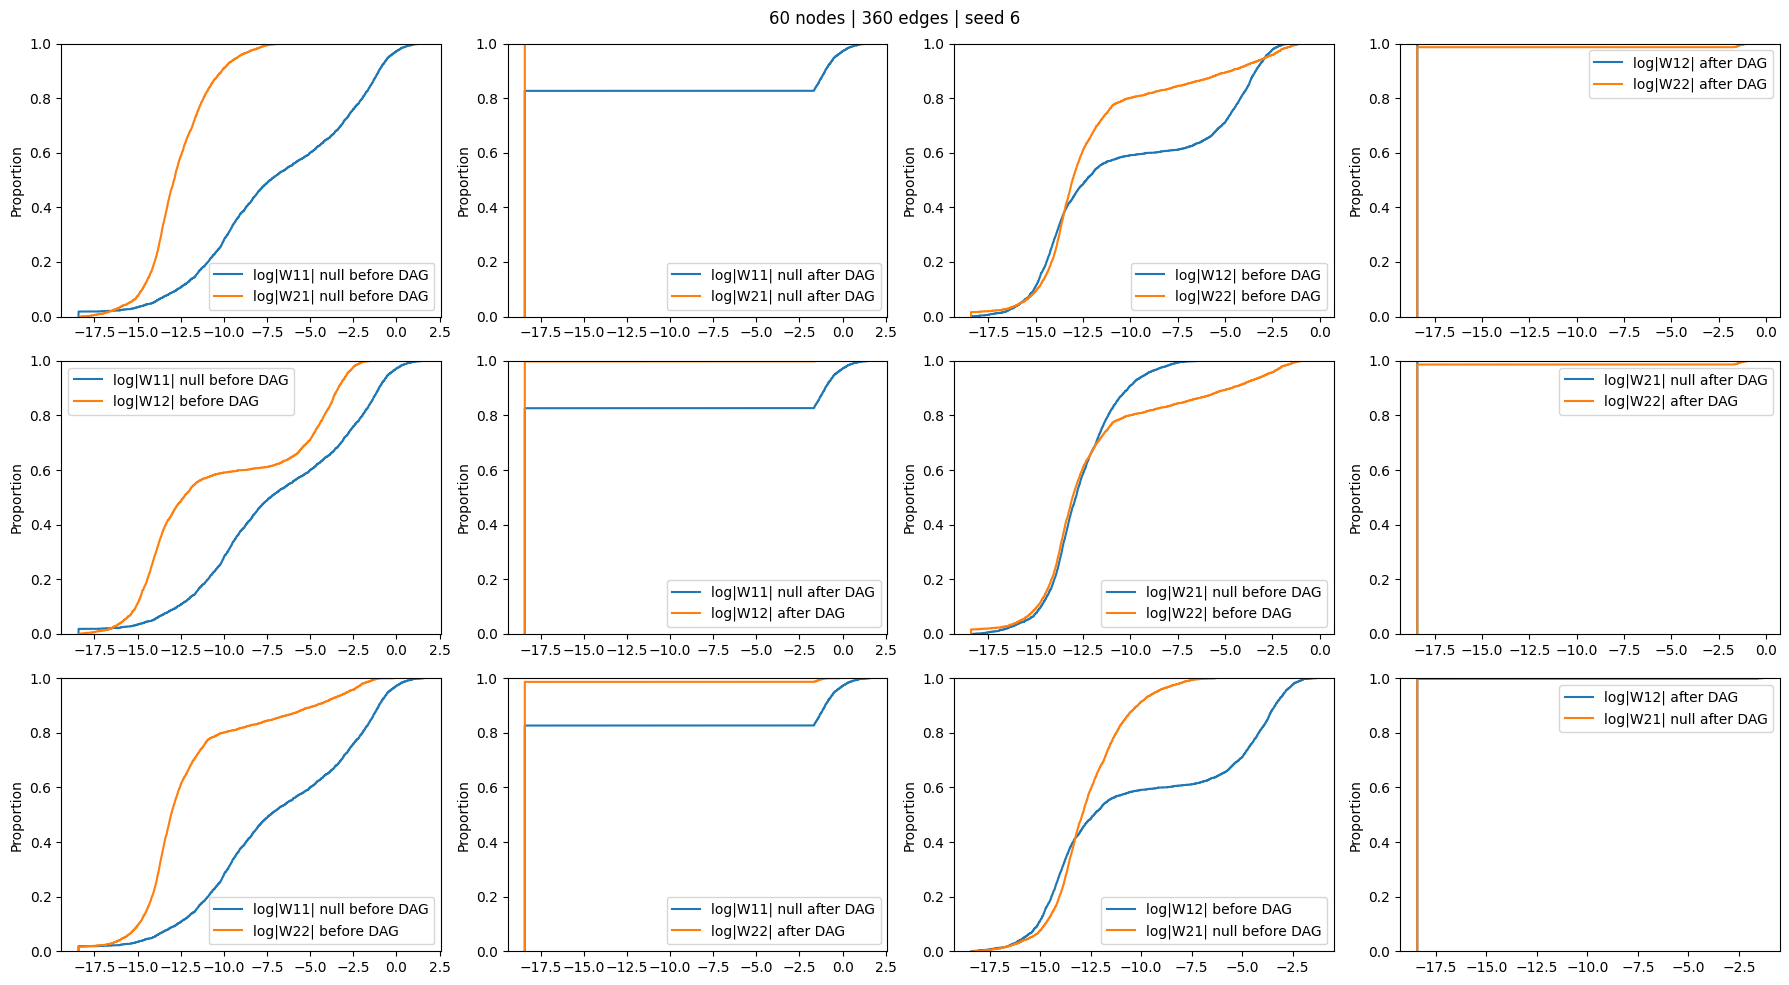

In [26]:
draw_results_3(60, 6, 6, "v33/v60_360")

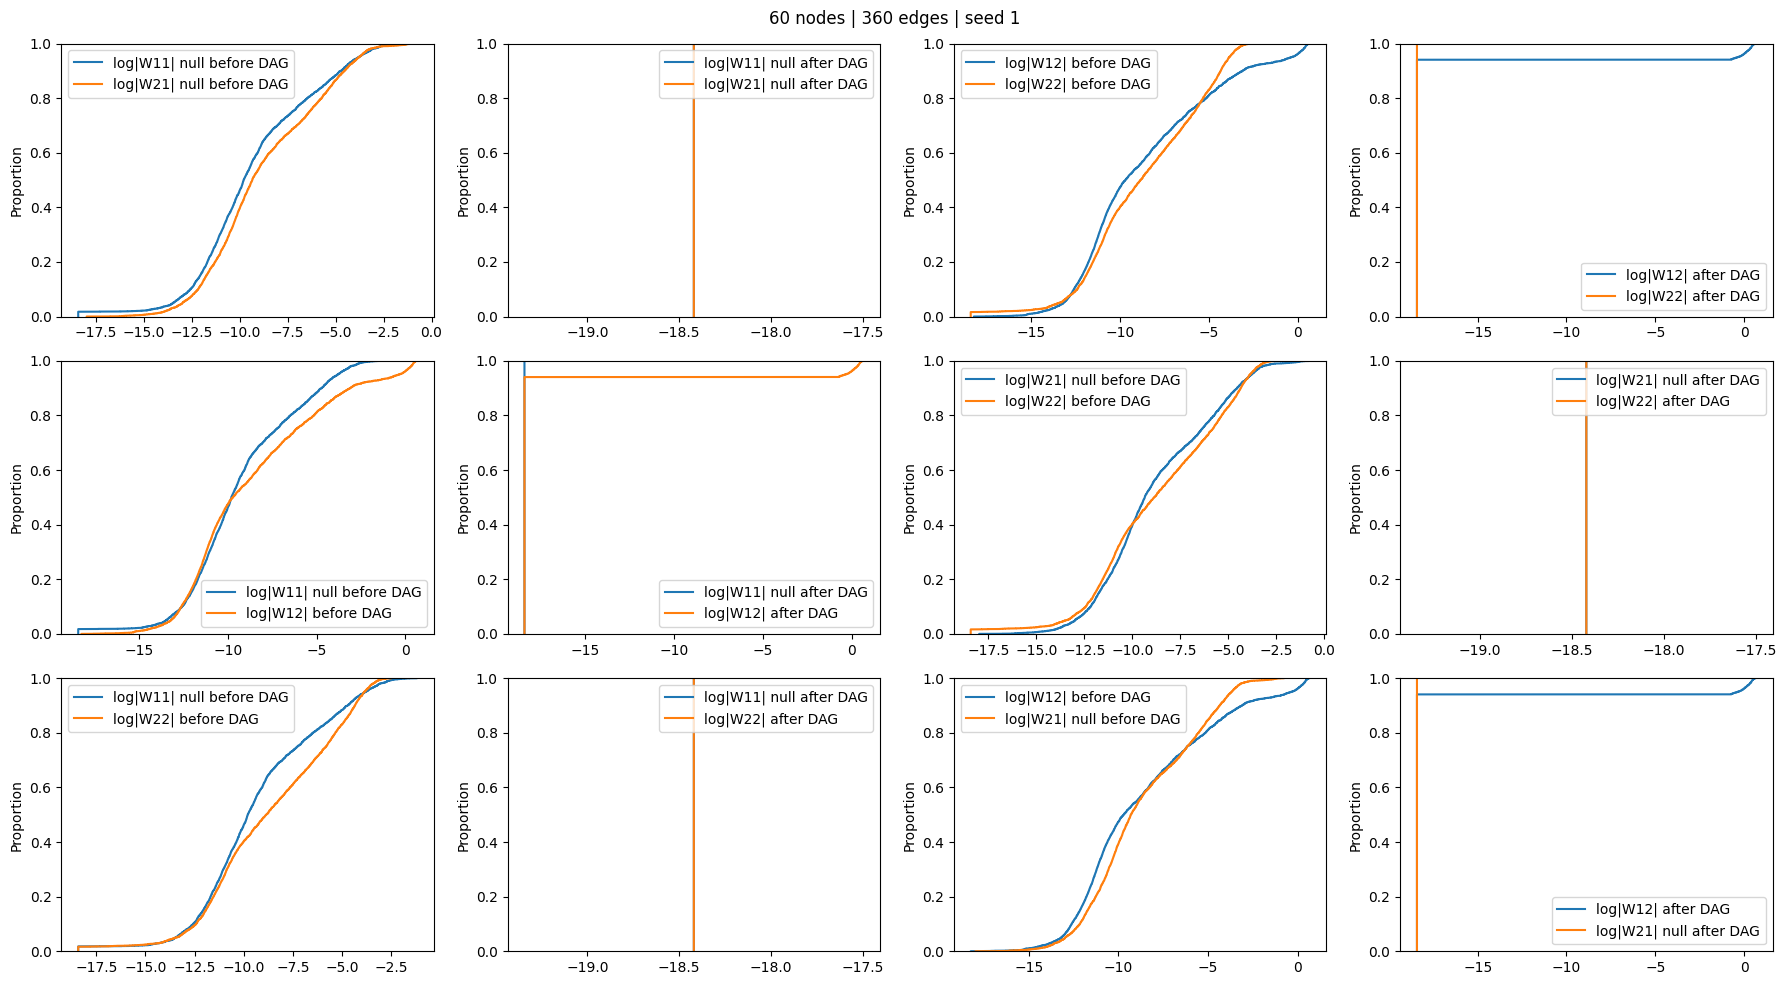

In [25]:
draw_results_3(60, 6, 1, "v35/v60_360")

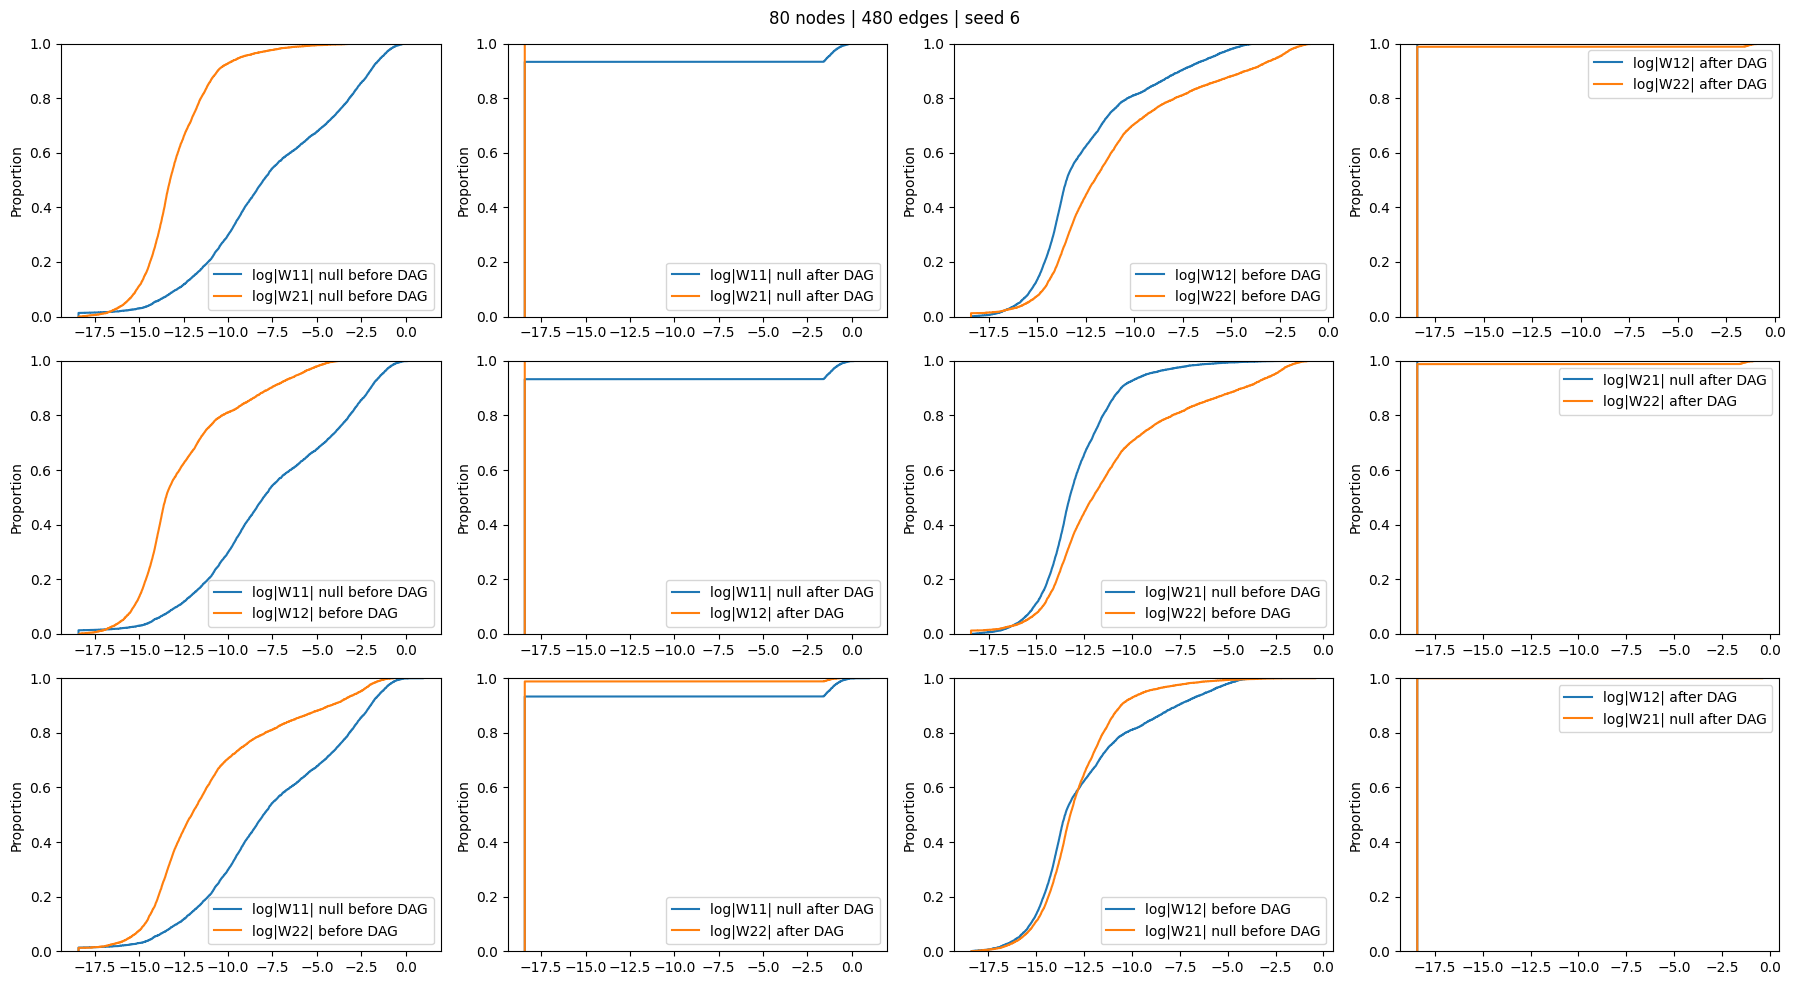

In [35]:
draw_results_3(80, 6, 6, "v33/v80_480")

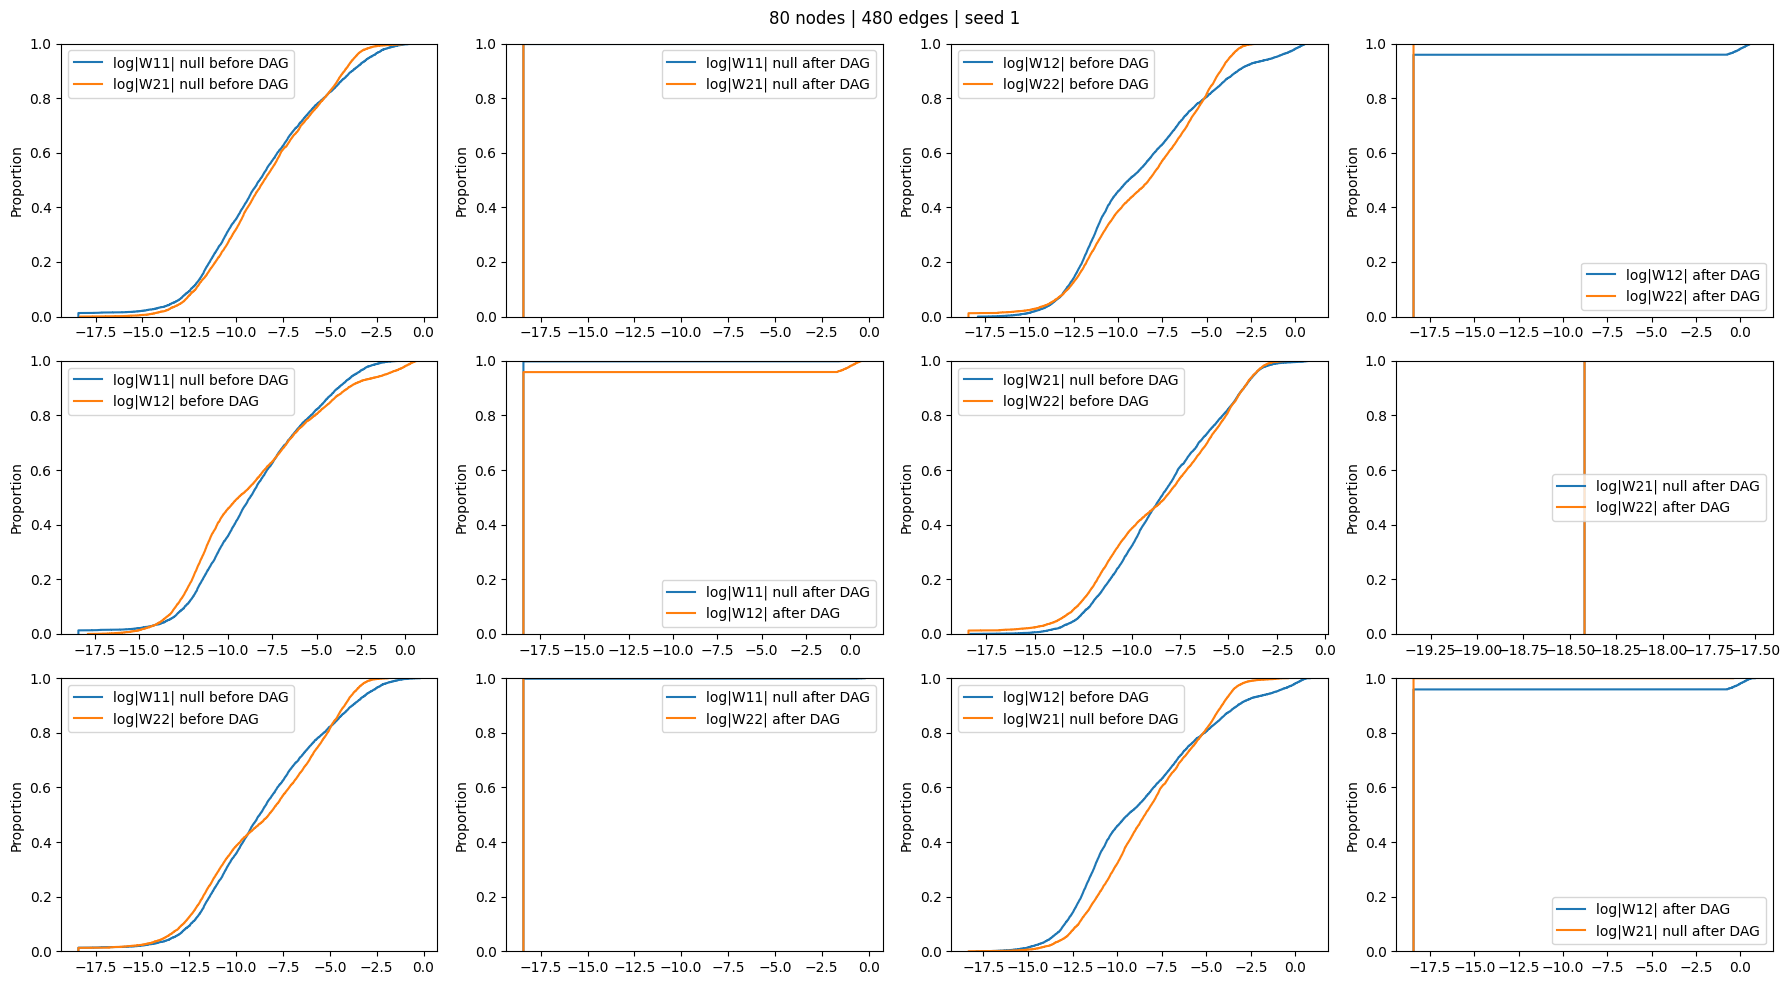

In [36]:
draw_results_3(80, 6, 1, "v35/v80_480")

In [32]:
def draw_results_3_1(n_nodes, er, seeds, version_path):

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    j = 0
    for seed in seeds[:3]:
        """W11 vs W21"""
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, f'{version_path}')
        sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][j], label='log|W11| null before DAG')
        sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][j], label='log|W21| null before DAG')
        j += 1

    j = 0
    for seed in seeds[3:]:
        """W11 vs W21"""
        j = seed - 9
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, f'{version_path}')
        sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][j], label='log|W11| null before DAG')
        sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][j], label='log|W21| null before DAG')
        j += 1
    

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges")
    plt.tight_layout()
    # plt.legend()
    plt.show()

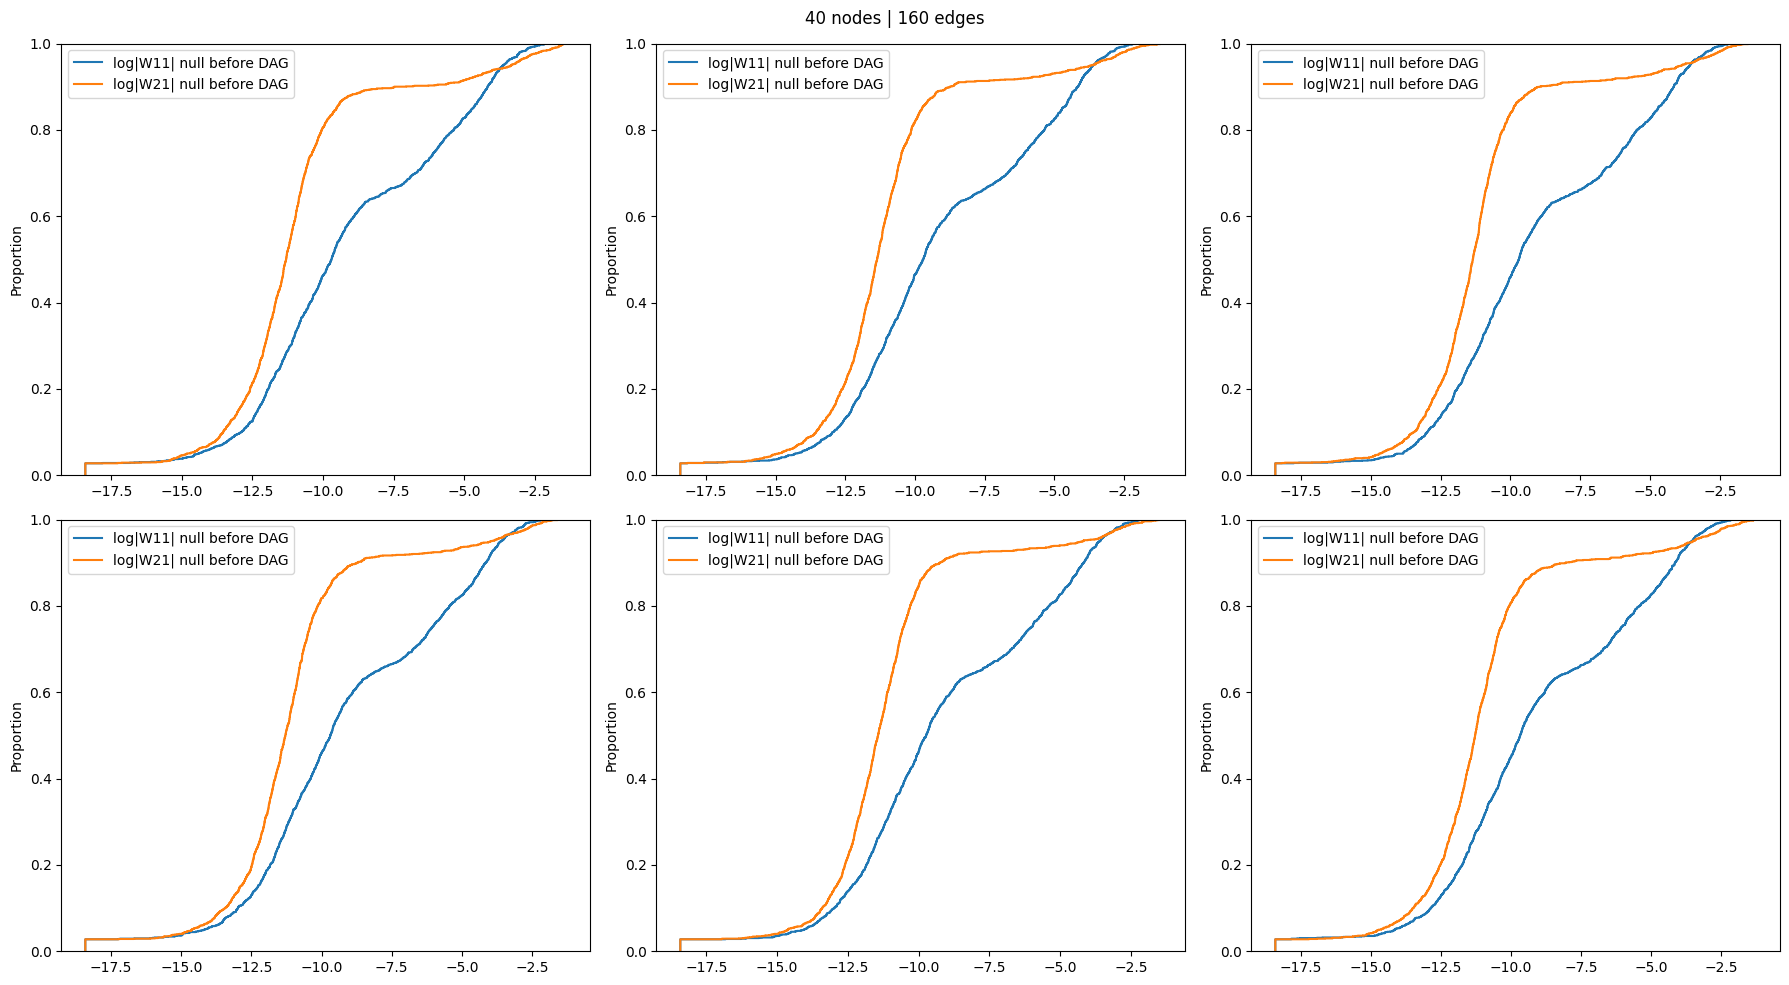

In [16]:
draw_results_3_1(40, 4, 'v11/v40')

/var/folders/_j/jhp4k00j0vx40wdvn_jv_jr40000gn/T/ipykernel_60043/1007484312.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i][j].legend()


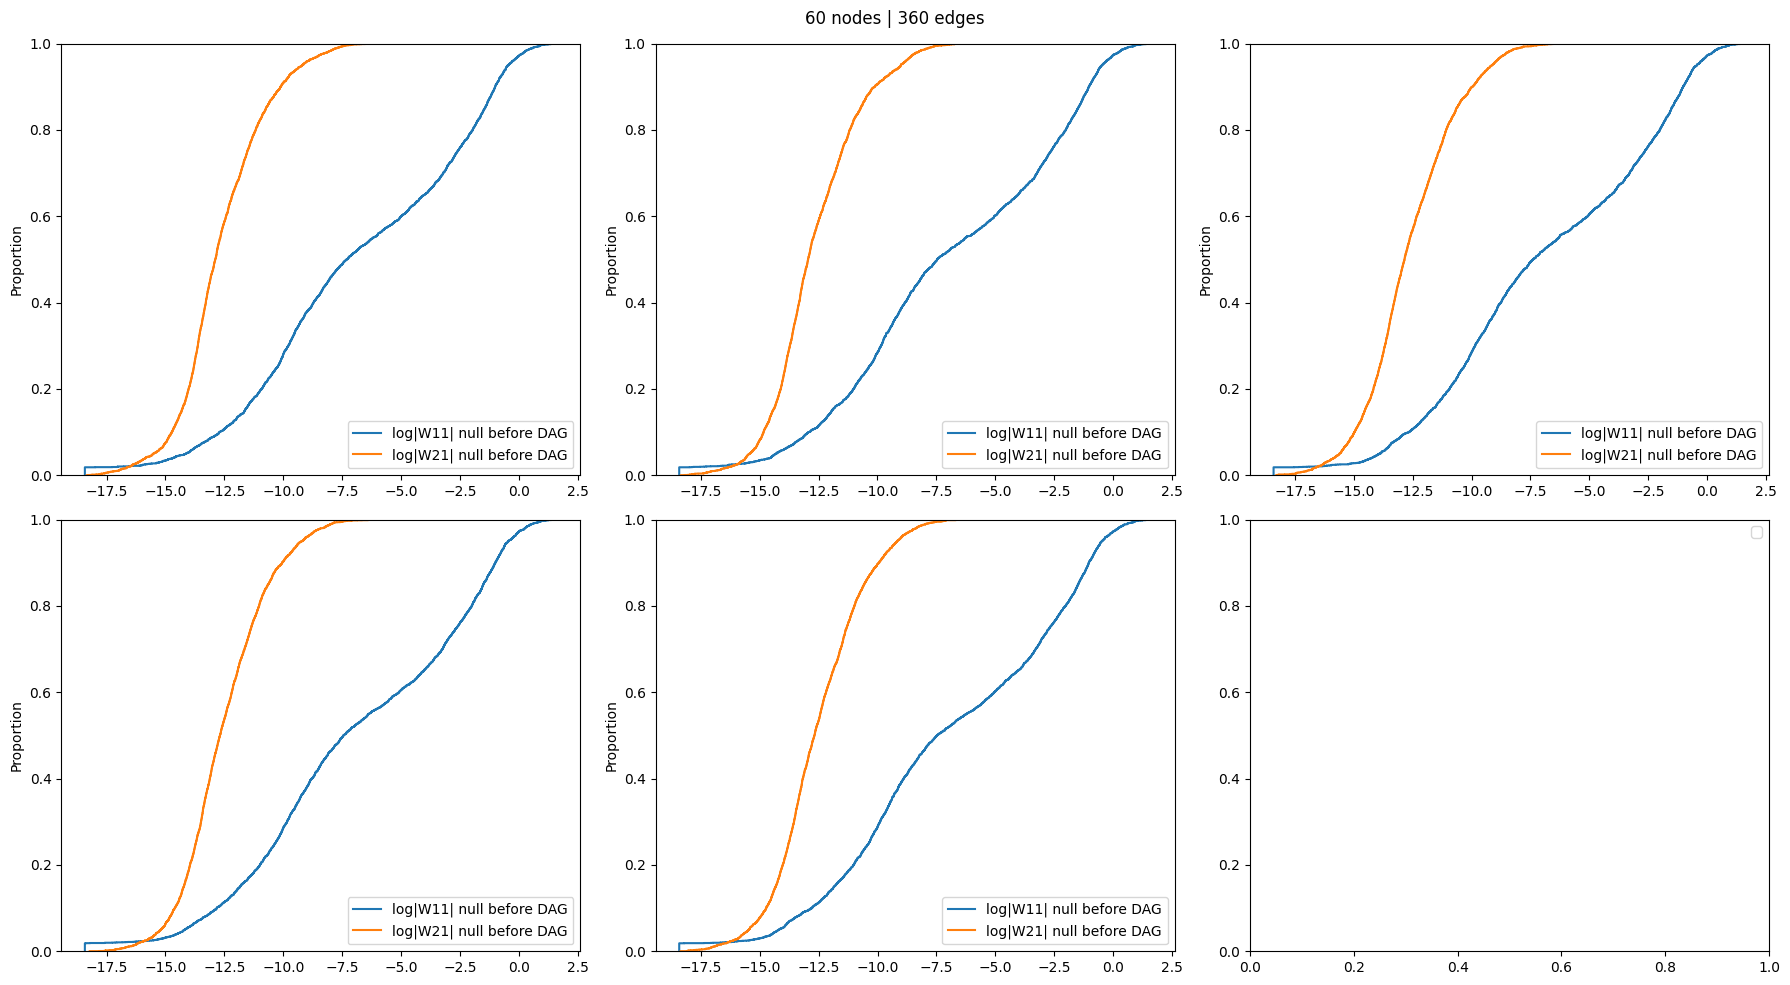

In [33]:
draw_results_3_1(60, 6, [6, 7, 8, 9, 10], 'v33/v60_360')

IndexError: index -5 is out of bounds for axis 0 with size 3

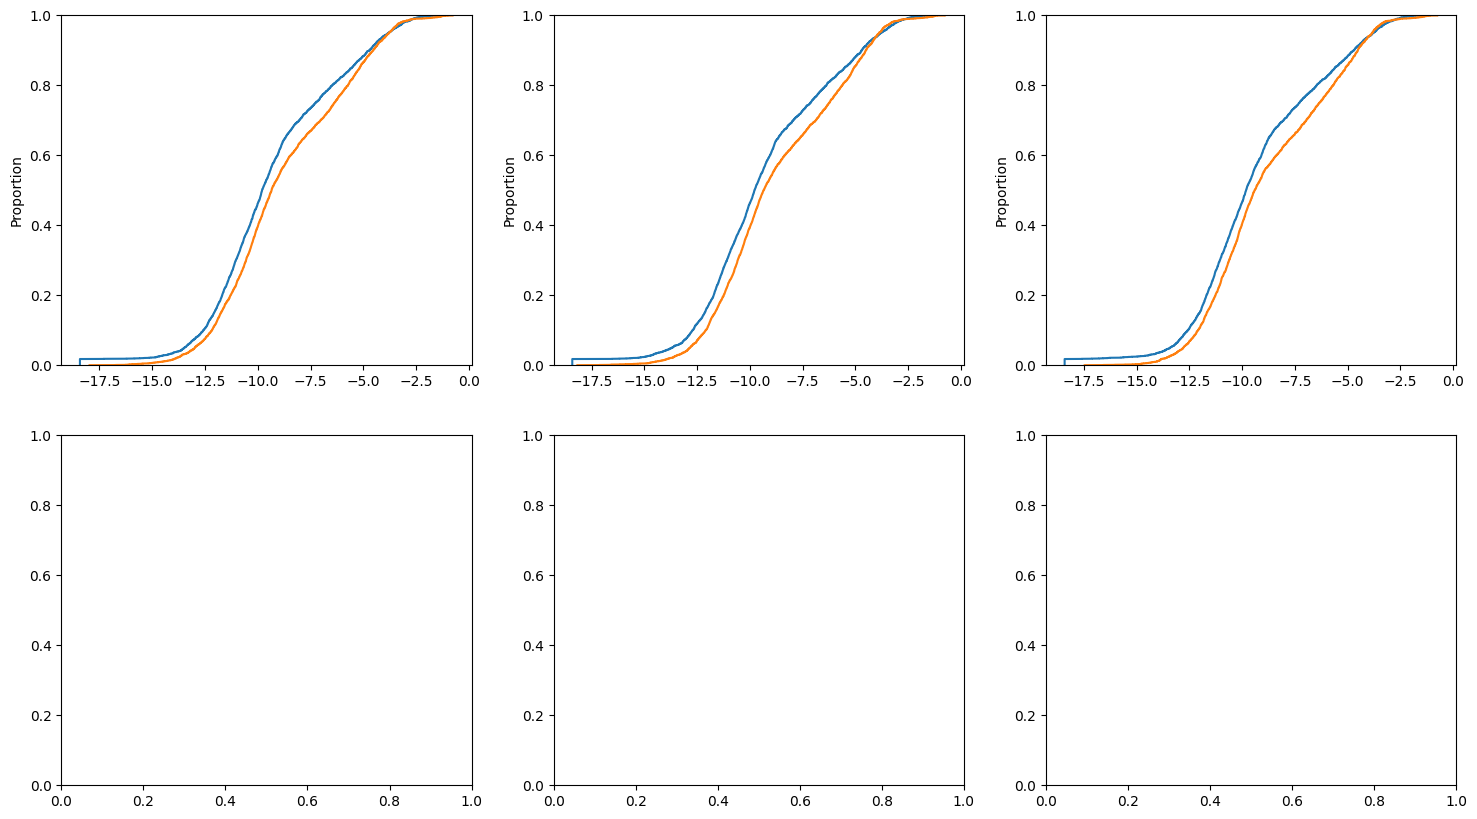

In [34]:
draw_results_3_1(60, 6, [1, 2, 3, 4, 5], 'v35/v60_360')

/var/folders/_j/jhp4k00j0vx40wdvn_jv_jr40000gn/T/ipykernel_60043/1007484312.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i][j].legend()


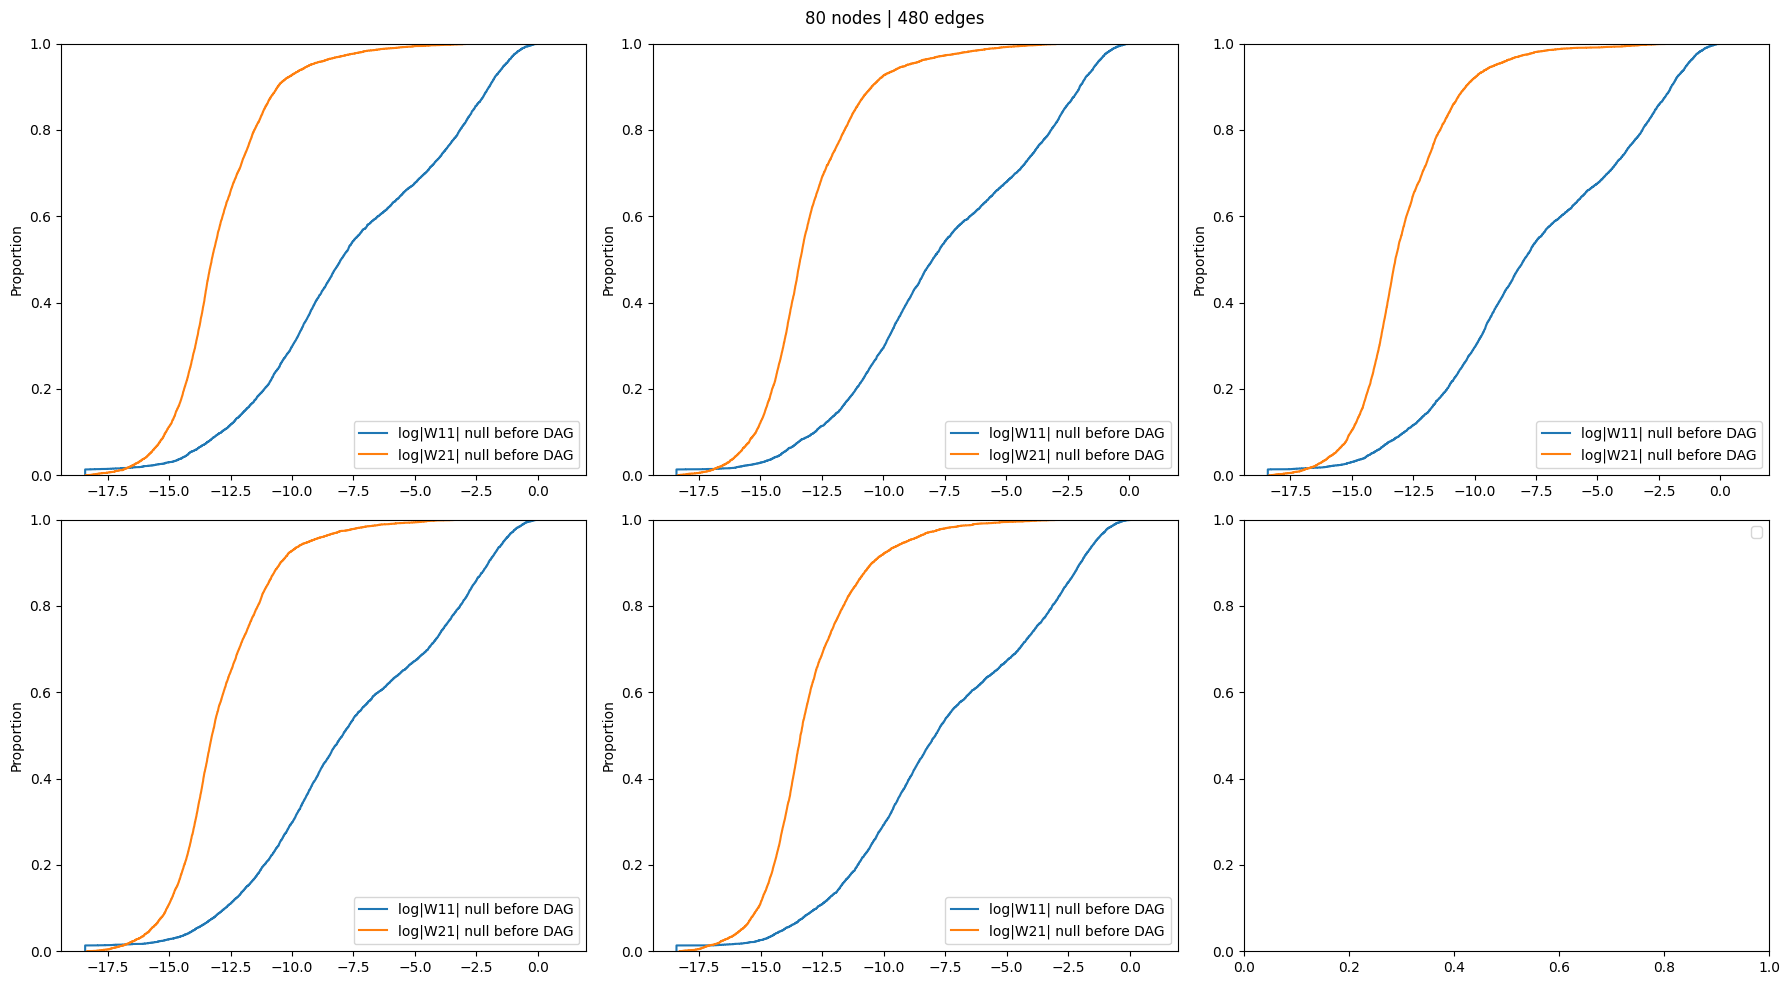

In [37]:
draw_results_3_1(80, 6, [6, 7, 8, 9, 10], 'v33/v80_480')

IndexError: index -5 is out of bounds for axis 0 with size 3

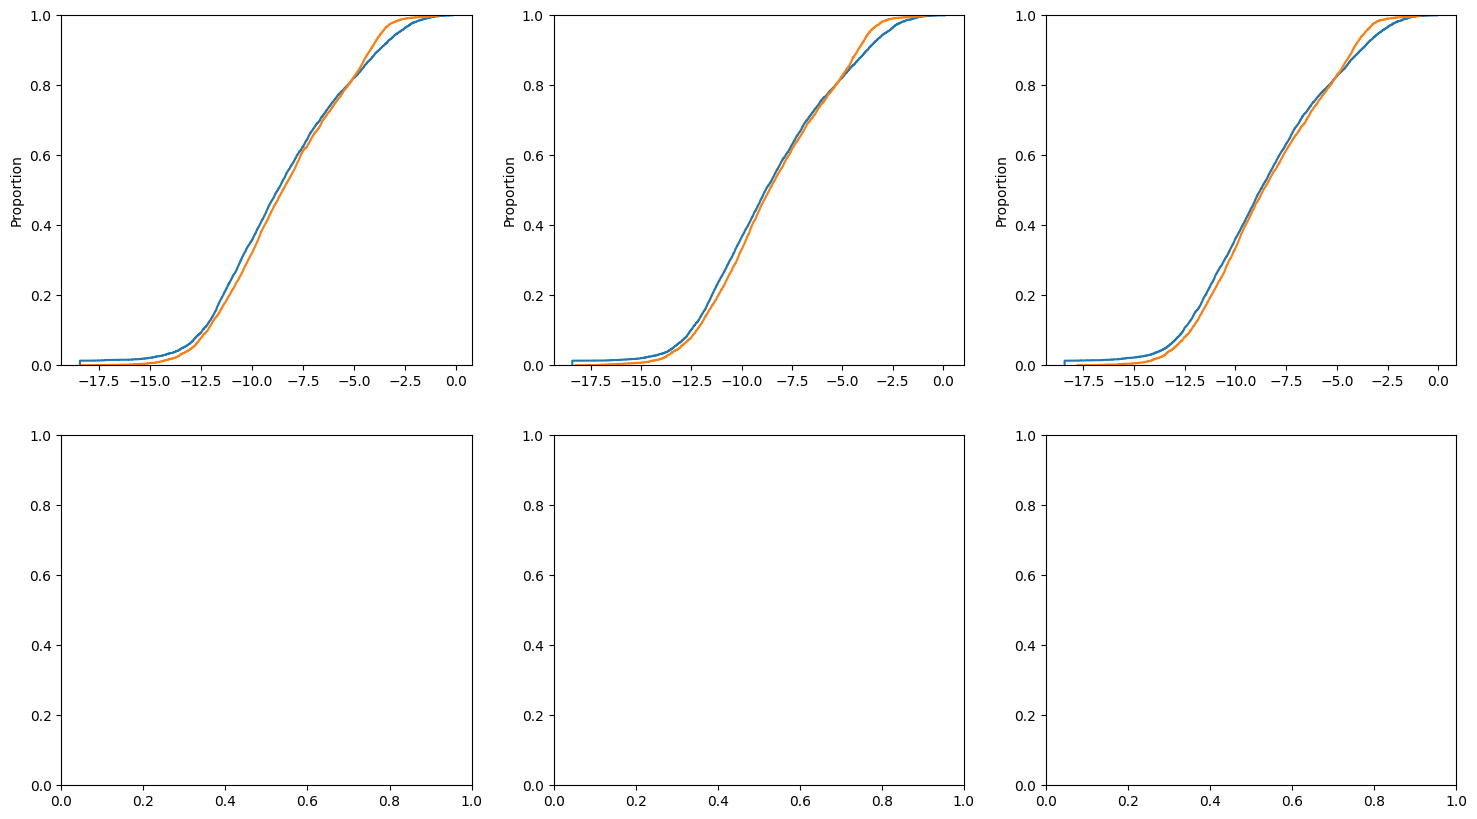

In [39]:
draw_results_3_1(80, 6, [1, 2, 3, 4, 5], 'v35/v80_480')

# New

In [93]:
import networkx as nx

In [42]:
def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    return B_true, W_est, W_est_1

def get_Z(data, n_nodes=20, left=11, right=21):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    return np.abs(data_dict[left]) - np.abs(data_dict[right])

In [121]:
n_nodes = 20

In [221]:
B_true, W_est, W_est_1 = load_data(20, 1, "v34/v20")

In [138]:
Z_11_21 = get_Z(W_est)

In [151]:
mask = (~B_true) & (Z_11_21 > 0.05)

In [152]:
mask.sum()

21

In [288]:
np.abs(W_est[:n_nodes, :n_nodes][~B_true]).mean()

0.011159522772884801

array([-1.13424003e-05, -1.27955144e-03,  4.48413614e-02, ...,
       -1.60148070e-05,  6.16505320e-03,  2.89746542e-03])

In [296]:
_data = W_est[:n_nodes, :n_nodes] 
mask = ~B_true
data = W_est @ W_est
print(np.abs(W_est[:n_nodes, :n_nodes][mask]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 3)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 4)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 5)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.011159522772884801
0.07298679633100369
0.09623815207511648
0.09461618718934822
0.08582262648419937


In [295]:
_data = W_est[:n_nodes, :n_nodes] 
mask = ~B_true & (_data > W_est[n_nodes:, :n_nodes])
data = W_est @ W_est
print(np.abs(W_est[:n_nodes, :n_nodes][mask]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 3)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 4)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 5)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.011054225566465932
0.07157551938423129
0.0948105289869313
0.08795757774210067
0.08301623505349635


In [306]:
_data = W_est[:n_nodes, :n_nodes] 
mask = ~B_true & (_data > (W_est[n_nodes:, :n_nodes]))
data = W_est @ W_est
print(np.abs(W_est[:n_nodes, :n_nodes][mask]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 3)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 4)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())
data = np.linalg.matrix_power(W_est, 5)
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.026591304378609536
0.10824613941106442
0.13479175728884812
0.12513592738376794
0.12191948008931744


In [161]:
data = W_est @ W_est
print(np.abs(data[:n_nodes, :n_nodes][~B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.22052608709292337
0.7225531421107768


In [162]:
data = np.linalg.matrix_power(W_est, 3)
print(np.abs(data[:n_nodes, :n_nodes][~B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.2763466894738195
0.9769263780157906


In [165]:
data = np.linalg.matrix_power(W_est, 4)
print(np.abs(data[:n_nodes, :n_nodes][~B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.2943728554506558
0.8160765762053579


In [192]:
data = np.abs(W_est @ W_est)[:n_nodes, :n_nodes]
mask = (data > np.quantile(data, 0.7)) & ~B_true
print(Z_11_21[~B_true].mean())
print(Z_11_21[mask].mean())

0.004553411917124706
0.039576676363474915


In [194]:
data = np.abs(np.linalg.matrix_power(W_est, 3)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.7)) & ~B_true
print(Z_11_21[~B_true].mean())
print(Z_11_21[mask].mean())

0.004553411917124706
0.03303589443761265


In [195]:
data = np.abs(np.linalg.matrix_power(W_est, 4)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.7)) & ~B_true
print(Z_11_21[~B_true].mean())
print(Z_11_21[mask].mean())

0.004553411917124706
0.035469291740704845


In [196]:
data = np.abs(np.linalg.matrix_power(W_est, 5)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.7)) & ~B_true
print(Z_11_21[~B_true].mean())
print(Z_11_21[mask].mean())

0.004553411917124706
0.036329312953743774


In [197]:
data = W_est @ W_est
print(np.abs(data[:n_nodes, :n_nodes][B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.7867286667539762
0.9703245738410817


In [198]:
data = np.linalg.matrix_power(W_est, 3)
print(np.abs(data[:n_nodes, :n_nodes][B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.8740254556554234
1.3076481875605337


In [199]:
data = np.linalg.matrix_power(W_est, 4)
print(np.abs(data[:n_nodes, :n_nodes][B_true]).mean())
print(np.abs(data[:n_nodes, :n_nodes][mask]).mean())

0.8159401309127343
1.4158533258965669


In [200]:
data = np.abs(W_est @ W_est)[:n_nodes, :n_nodes]
mask = (data > np.quantile(data, 0.7)) & B_true
print(Z_11_21[B_true].mean())
print(Z_11_21[mask].mean())

0.8016202674592943
0.7212226916372961


In [213]:
data = np.abs(np.linalg.matrix_power(W_est, 3)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.95)) & B_true
print(Z_11_21[B_true].mean())
print(Z_11_21[mask].mean())

0.8016202674592943
0.8333978490759961


In [215]:
data = np.abs(np.linalg.matrix_power(W_est, 4)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.95)) & B_true
print(Z_11_21[B_true].mean())
print(Z_11_21[mask].mean())

0.8016202674592943
0.642302160540274


In [216]:
data = np.abs(np.linalg.matrix_power(W_est, 5)[:n_nodes, :n_nodes])
mask = (data > np.quantile(data, 0.95)) & B_true
print(Z_11_21[B_true].mean())
print(Z_11_21[mask].mean())

0.8016202674592943
0.703637050456433


# Vis

In [274]:
data_null.shape

(320,)

In [275]:
len(labels_null)

640

Text(0.5, 0.98, '20 nodes, 80 edges, seed=1')

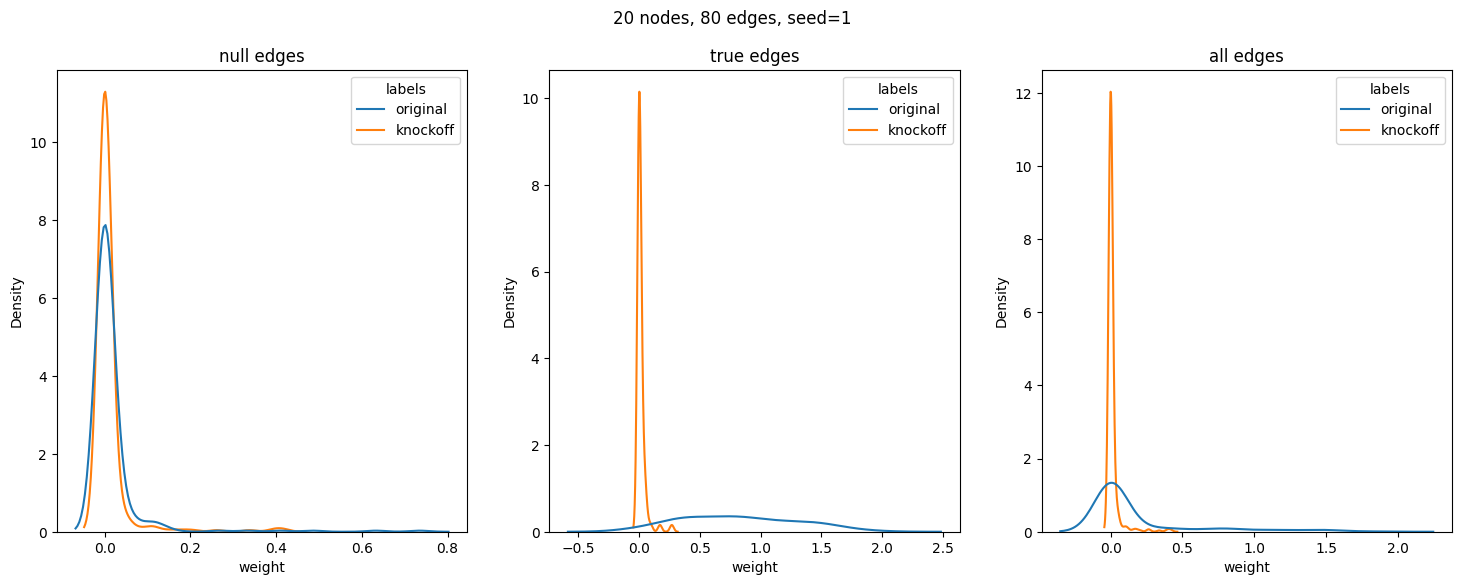

In [281]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
n_nodes = 20
B_true, W_est, W_est_1 = load_data(n_nodes, 1, "v34/v20")

data_null = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][~B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][~B_true]).flatten()
])
labels_null = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][~B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][~B_true]).size
data_null = pd.DataFrame({'weight': data_null, 'labels': labels_null})
sns.kdeplot(data_null, x='weight', hue='labels', ax=axs[0])

data_true = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][B_true]).flatten()
])
labels_true = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][B_true]).size
data_true = pd.DataFrame({'weight': data_true, 'labels': labels_true})
sns.kdeplot(data_true, x='weight', hue='labels', ax=axs[1])

data = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes]).flatten()
])
labels = ['original'] * np.abs(W_est[:n_nodes, :n_nodes]).size + \
         ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes]).size
data = pd.DataFrame({'weight': data, 'labels': labels})
sns.kdeplot(data, x='weight', hue='labels', ax=axs[2])

axs[0].set_title("null edges")
axs[1].set_title("true edges")
axs[2].set_title("all edges")

fig.suptitle('20 nodes, 80 edges, seed=1')

Text(0.5, 0.98, '100 nodes, 400 edges, seed=1')

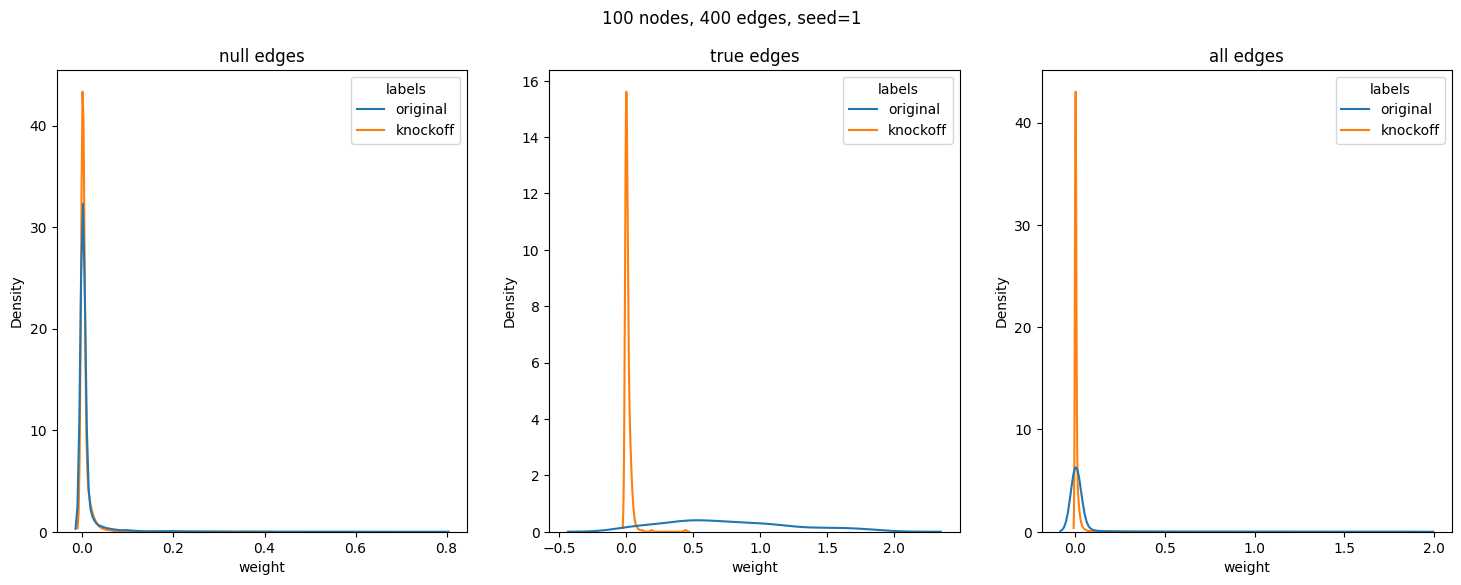

In [286]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
n_nodes = 100
B_true, W_est, W_est_1 = load_data(n_nodes, 1, "v34/v100")

data_null = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][~B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][~B_true]).flatten()
])
labels_null = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][~B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][~B_true]).size
data_null = pd.DataFrame({'weight': data_null, 'labels': labels_null})
sns.kdeplot(data_null, x='weight', hue='labels', ax=axs[0])

data_true = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][B_true]).flatten()
])
labels_true = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][B_true]).size
data_true = pd.DataFrame({'weight': data_true, 'labels': labels_true})
sns.kdeplot(data_true, x='weight', hue='labels', ax=axs[1])

data = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes]).flatten()
])
labels = ['original'] * np.abs(W_est[:n_nodes, :n_nodes]).size + \
         ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes]).size
data = pd.DataFrame({'weight': data, 'labels': labels})
sns.kdeplot(data, x='weight', hue='labels', ax=axs[2])

axs[0].set_title("null edges")
axs[1].set_title("true edges")
axs[2].set_title("all edges")

fig.suptitle('100 nodes, 400 edges, seed=1')

Text(0.5, 0.98, '80 nodes, 480 edges, seed=1')

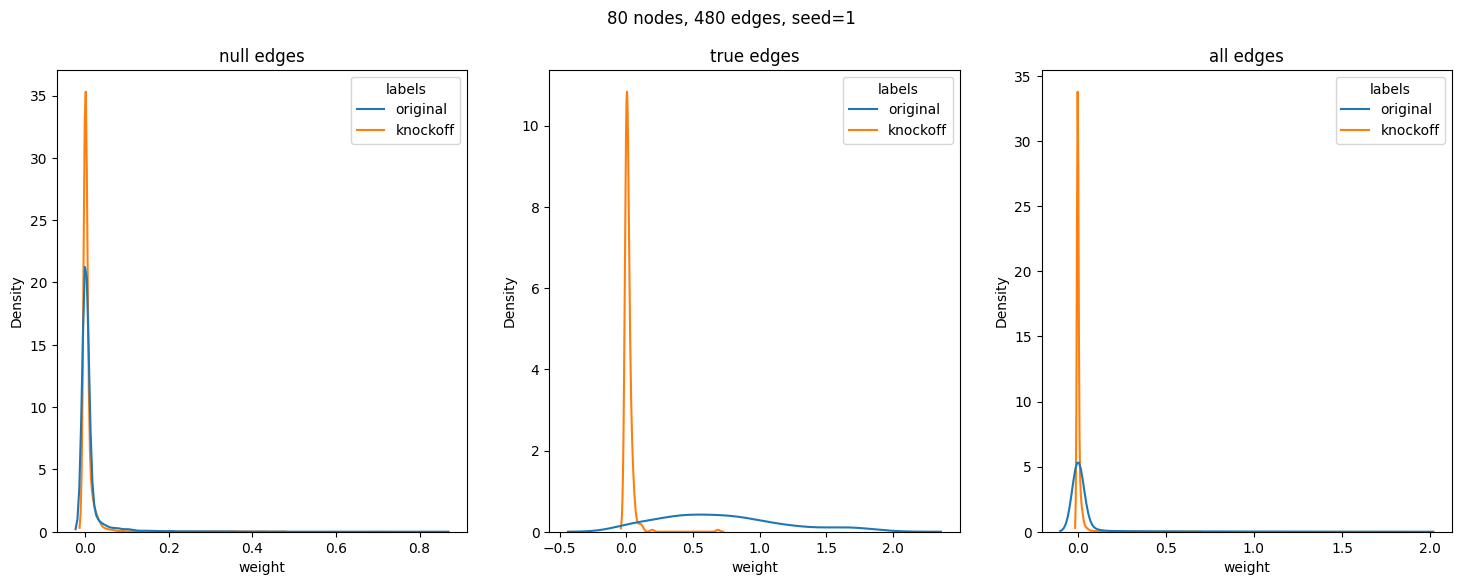

In [287]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
n_nodes = 80
B_true, W_est, W_est_1 = load_data(n_nodes, 1, "v35/v80_480")

data_null = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][~B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][~B_true]).flatten()
])
labels_null = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][~B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][~B_true]).size
data_null = pd.DataFrame({'weight': data_null, 'labels': labels_null})
sns.kdeplot(data_null, x='weight', hue='labels', ax=axs[0])

data_true = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes][B_true]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes][B_true]).flatten()
])
labels_true = ['original'] * np.abs(W_est[:n_nodes, :n_nodes][B_true]).size + \
              ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes][B_true]).size
data_true = pd.DataFrame({'weight': data_true, 'labels': labels_true})
sns.kdeplot(data_true, x='weight', hue='labels', ax=axs[1])

data = np.concatenate([
        np.abs(W_est[:n_nodes, :n_nodes]).flatten(),
        np.abs(W_est[n_nodes:, :n_nodes]).flatten()
])
labels = ['original'] * np.abs(W_est[:n_nodes, :n_nodes]).size + \
         ['knockoff'] * np.abs(W_est[n_nodes:, :n_nodes]).size
data = pd.DataFrame({'weight': data, 'labels': labels})
sns.kdeplot(data, x='weight', hue='labels', ax=axs[2])

axs[0].set_title("null edges")
axs[1].set_title("true edges")
axs[2].set_title("all edges")

fig.suptitle('80 nodes, 480 edges, seed=1')